<u><center><h1> Projet IA </h1></center></u>

<img
    src="https://media.lesechos.com/api/v1/images/view/5e56479f3e45463f2c5e2f78/1280x720-webp/11513-1522338774-ia.webp"
    alt="[ABC Tech posssède 75% de part de marché et XYZ 25%]"
    height="600px"
    width="600px"
/>

<u> <h2><FONT color="darkred"> Préambule </FONT></h2> </u>
    
<h3>Point d'attention</h3>
    
Tous les codes adaptés de codes mis à disposition sur internet sont cités dans la bibliographie.

<h3> a) Importation des packages </h3>

<p style="text-align: justify;">Ici, on importe tous les packages nécessaires à l'utilisation des différentes techniques présentées dans le cadre ce rapport. Sklearn ainsi que nltk sont deux packages très répandus lors de la réalisation de travaux sur le domaine NLP (Natural processing language).</p>

In [ ]:
#Package
import warnings
warnings.filterwarnings('ignore')


# les installations de packages

#!pip install langdetect
#!pip install pyquickhelper
#!pip install pyensae

from nltk.corpus import stopwords
import nltk
from nltk.util import ngrams
from nltk.probability import FreqDist
from nltk.corpus import wordnet 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import pandas as pd
import numpy as np
import pickle
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import re
import string
from translate import Translator
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from langdetect import detect
import spacy
from spacy.cli import download
from sklearn.feature_extraction.text import CountVectorizer


#Declaration d'une fonction pour la suite
re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')
def tokenize(s): return re_tok.sub('', s).split()

#Dowload
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cleme\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cleme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cleme\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

<h3> b) Importation des données </h3>

<p style="text-align: justify;">Dans cette section les données sont importées. Cela est fait depuis deux fichiers ".json" pour les 217 000 descriptions de la base de données d'apprentissage ainsi que les 54 000 descriptions de la base données test. On importe un ".csv" contenant les classes auxquelles appartiennent les 217 000 descriptions d'apprentissage en plus.</p>

In [ ]:
train_df = pd.read_json("train.json")
test_df = pd.read_json("test.json")
train_label = pd.read_csv("train_label.csv")

<u> <h2><FONT color="darkred"> I - Quelques statistiques descriptives </FONT></h2> </u>
    
<p style="text-align: justify;">Afin de mieux comprendre notre jeu de données on peut l'étudier à l'aide de quelques statistiques descriptives. Dans un premier temps on étudie les longueurs moyennes, les écarts-types, les quartiles, etc... de la longueur de nos descriptions.</p>

In [ ]:
#apprentissage
description_text = train_df.description
description_token = description_text.apply(tokenize)

vect=[]
for line in description_token:
    vect.append(len(line))
        
#test
description_text = test_df.description
description_token = description_text.apply(tokenize)

vect_test=[]
for line in description_token:
    vect_test.append(len(line))
    
vect_1=pd.DataFrame(vect)
vect_2=pd.DataFrame(vect_test)
vect_1 = vect_1.rename({0: 'Apprentissage'}, axis=1)
vect_2 = vect_2.rename({0: 'Test'}, axis=1)

stat_des = pd.concat([vect_1, vect_2], axis=1)
stat_des.describe()

,Apprentissage,Test
count,217197.000000,54300.000000
mean,61.039959,60.973775
std,28.022422,28.084658
min,6.000000,8.000000
25%,38.000000,38.000000
50%,56.000000,56.000000
75%,79.000000,79.000000
max,179.000000,174.000000


<p style="text-align: justify;">On observe de ce côté-là une très grande similitude entre les jeux de données de test et d'apprentissage concernant les descriptions qui les composent. Il n'y a donc à ce niveau là pas de raison d'envisager d'effectuer un retraitement pour les rendre plus similaires. On peut aussi observer ces répartitions de manières plus précises avec des histogrammes. L'histogramme rouge pour le jeu d'apprentissage et le bleu pour le test. Les deux sont ainsi très similaires.</p>

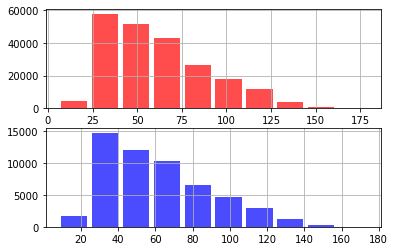

In [ ]:
fig, (ax1, ax2) = plt.subplots(2)

ax1.hist(vect,bins=10,color='r',alpha=0.7, rwidth=0.85,density=False)
ax1.grid(True)
ax2.hist(vect_test,bins=10,color='b',alpha=0.7, rwidth=0.85,density=False)
ax2.grid(True)

On peut aussi s'intéresser à la répartition des effectifs par classe ainsi que de la répartition homme/femme à l'intérieur de chaque classe.

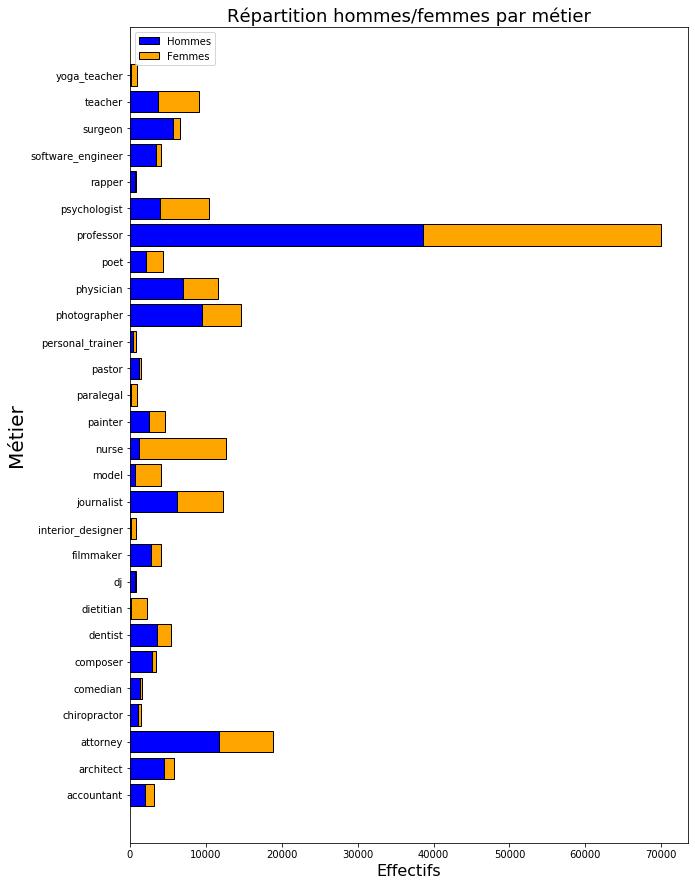

In [ ]:
# Catégorie professionnelle et répartition homme/femme
names = pd.read_csv('categories_string.csv')['0'].to_dict()
jobs = pd.read_csv('train_label.csv', index_col='Id')['Category']
jobs = jobs.map(names)
jobs = jobs.rename('job')
genders = pd.read_json('train.json').set_index('Id')['gender']

people = pd.concat((jobs, genders), axis='columns')
counts = people.groupby(['job', 'gender']).size().unstack('gender')
counts
# Représentation graphique de la répartition des métiers par sexe
nb_jobs = len(counts)

metier = np.sort(list(names.values()))
sexe =['Hommes','Femmes']
pos = np.arange(len(metier))
metier_hommes = list(counts.M)
metier_femmes = list(counts.F)

plt.figure(figsize=(10,15))
plt.barh(pos,metier_hommes,color='blue',edgecolor='black')
plt.barh(pos,metier_femmes,color='orange',edgecolor='black',left=metier_hommes)
plt.yticks(pos, metier)
plt.ylabel('Métier', fontsize=20)
plt.xlabel('Effectifs', fontsize=16)
plt.title('Répartition hommes/femmes par métier',fontsize=18)
plt.legend(sexe,loc=2)
plt.show()

<p style="text-align: justify;">Cette représentation est extrêmement informative et permet d'observer un énorme déséquilibre dans les classes. Les professeurs représentent plus de 70 000 descriptions soit près d'un tiers alors que les professeurs de yoga, coachs personnels ou rappeurs ne sont que très peu représentés. Ceci peut causer des déséquilibres pour la suite si les algorithmes ne sont pas assez performants pour reconnaitre les différences entre les descriptions des métiers, ils peuvent avoir tendance à surreprésenter les classes majoritaires (souvent la classe 19 : professeur).</p>
    
<p style="text-align: justify;">Il existe des méthodes pour contrebalancer ce problème partiellement si le jeu de données d'apprentissage est très différent du jeu de données test dans la répartition des classes. Cependant, n'ayant pas les labels du jeu test il est impossible de le vérifier. Nous avons mis en place certaines de ces techniques (l'une consiste à dupliquer certaines descriptions des classes minoritaires, l'autre consiste à traduire certaines descriptions des classes minoritaires vers une langue tierce (par exemple l'allemand ou le français) avant de retraduire dans la langue anglaise.</p>

<p style="text-align: justify;">Dans cette deuxième technique le résultat est ainsi légèrement différent de l'original et on a ainsi une autre description de la classe. Cependant aucune de ces deux méthodes ne s'est avérée efficace traduisant potentiellement que la répartition des classes dans le jeu de données test est sans doute très proche du jeu de données d'apprentissage. Nous mettons tout de même ci-dessous un code permettant de détecter la langue d'origine d'une description ainsi que de la traduire vers une langue cible. Nous avons mené cette étude mais celle-ci n'étant pas concluante nous n'irons pas plus loin.</p>

In [ ]:
translator= Translator(to_lang="en",from_lang = "fr")
translation = translator.translate('Ceci est un test afin de faire une illustration convaincante.')
print(translation)

This is a test in order to make a convincing illustration.


<p style="text-align: justify;">On a aussi étudié la langue des descriptions mais seulement un nombre largement minoritaire dans l'ensemble d'apprentissage et de test sont dans une langue différente de l'anglais (116 pour l'apprentissage et 28 pour le test). Un exemple d'une de ces descriptions ci-dessous avec un code pour en détecter la langue :</p>

In [ ]:
lang=detect(train_df.iloc[267]["description"])
print(train_df.iloc[267]["description"])
print(" ")
print("cette description est en "+"\""+lang+"\"")

 He informs martial arts to his two children. However, his past catches up to him because a scoundrel’s agent requires to know the whereabouts of an agent known as a dragon. Now father and children must get together to stop the scoundrel’s agents and his idiots. Teddy Yu ist gedrehter Chiropraktiker eines ehemaligen Geheimagenten, der dachte, dass er seine Vergangenheit zurückließ. Er unterrichtet Kampfsportarten seinen zwei Kindern. Jedoch holt seine Vergangenheit zu ihm auf, weil ein Schelm-Agent verlangt, den Verbleib eines als Drache bekannten Agenten zu wissen. Jetzt müssen sich Vater und Kinder zusammentun, den Schelm-Agenten und seine Idioten aufzuhören.
 
cette description est en "de"


D'autres statistiques descriptives ont aussi été effectuées lors des différents cours en classe provenant du code de Mr BIGOT, comme des word clouds (nuage de mots) ou autres. Cependant nous n'avons pas jugé intéressant de les faire apparaître ici, étant donné que notre meilleure méthode, BERT, que nous introduirons par la suite n'est pas vraiment sensible à ces études préliminaires.

<u> <h2><FONT color="darkred"> II - Prétraitement des données </FONT></h2> </u>

<p style="text-align: justify;">Dans un premier temps pour de nombreuses méthodes (pas toutes, on verra que BERT ne le requiert pas par exemple) on effectue un prétraitement de données.</p>

<p style="text-align: justify;">La première étape consiste à mettre les descriptions en minuscules afin que par la suite deux mots ne soient pas identifiés comme étant diffèrent si l'un est le même que l'autre se situant seulement au début d'une phrase. Exemple:
"study" et "Study".</p>

In [ ]:
# Description en minuscule

train_df["description_lower"] = [x.lower() for x in train_df.description]
test_df["description_lower"] = [x.lower() for x in test_df.description]

<h3> a) Lemmatization </h3>

<p style="text-align: justify;">La lemmatization est une étape souvent très importante lors de l'étude d'un problème de NLP. Elle consiste à rapporter des mots à une racine. Ainsi les mots "playing", "played" et "plays" sont ramenés à la même racine "play" par exmple et seront identifiés comme identiques par la suite. Cela participe en général à améliorer grandement les résultats. De plus des verbes issus de la même base y seront ramenés comme "was", "were", "been" etc... seront ramenés à "be".</p>
<p style="text-align: justify;">Pour finir, il convient de noter qu'il existe différentes fonctions pour lemmatizer (package spacy, stanford, gensim, pattern etc...). Nous en avons étudié plusieurs et celle de WordNetLemmatizer associée à des POS_TAG (petites lettres signifiant si le mot est un verbe, un nom, un adverbe etc...) est celle qui nous a fourni les meilleurs résultats.</p>

<h4> Lemmatization de l'ensemble d'entrainement </h4>

<p style="text-align: justify;">Ci-dessous on effectue la lemmatization du jeu de données d'apprentissage. On affiche de plus des exemples pour observer les résultats.</p>

In [ ]:
lemmatizer = WordNetLemmatizer() 
def pos_tagger(nltk_tag): 
    if nltk_tag.startswith('J'): 
        return wordnet.ADJ 
    elif nltk_tag.startswith('V'): 
        return wordnet.VERB 
    elif nltk_tag.startswith('N'): 
        return wordnet.NOUN 
    elif nltk_tag.startswith('R'): 
        return wordnet.ADV 
    else:           
        return None

# Lemmatisation du jeu de données train
vect=[]
for i in train_df["description_lower"]:
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(i))  
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged)) 

    lemmatized_sentence = " "
    for word, tag in wordnet_tagged: 
        if tag is None:  
            lemmatized_sentence=lemmatized_sentence+" "+word 
        else:         
            lemmatized_sentence=lemmatized_sentence+" "+lemmatizer.lemmatize(word, tag)
    vect.append(lemmatized_sentence)
train_df["description_lemmatized"]=vect


In [ ]:
train_df.head()

,Id,description,gender,description_lower,description_lemmatized
0,0,She is also a Ronald D. Asmus Policy Entrepre...,F,she is also a ronald d. asmus policy entrepre...,she be also a ronald d. asmus policy entrepr...
1,1,He is a member of the AICPA and WICPA. Brent ...,M,he is a member of the aicpa and wicpa. brent ...,he be a member of the aicpa and wicpa . bren...
2,2,Dr. Aster has held teaching and research posi...,M,dr. aster has held teaching and research posi...,dr. aster have hold teach and research posit...
4,3,He runs a boutique design studio attending cl...,M,he runs a boutique design studio attending cl...,he run a boutique design studio attend clien...
5,4,"He focuses on cloud security, identity and ac...",M,"he focuses on cloud security, identity and ac...","he focus on cloud security , identity and ac..."


Les descriptions ont bien été lemmatizées.

<h4>Lemmatization du jeu de données test</h4>

Ci-dessous on effectue la lemmatization du jeu de données test.

In [ ]:
# Lemmatisation du jeu de données test

vect=[]
for i in test_df["description_lower"]:
    pos_tagged = nltk.pos_tag(nltk.word_tokenize(i))
    wordnet_tagged = list(map(lambda x: (x[0], pos_tagger(x[1])), pos_tagged)) 
    lemmatized_sentence = " "
    for word, tag in wordnet_tagged: 
        if tag is None: 
            lemmatized_sentence=lemmatized_sentence+" "+word 
        else:         
            lemmatized_sentence=lemmatized_sentence+" "+lemmatizer.lemmatize(word, tag)

    vect.append(lemmatized_sentence)
test_df["description_lemmatized"]=vect

<u><h3> b) Les stop words </h3></u>

<p style="text-align: justify;">Une autre étape est d'étudier l'impact des stop words et plus particulièrement l'impact de leur présence ou non. Un stop word est un mot très (trop) présent dans le vocabulaire anglais et qui n'aurait ainsi aucun pouvoir discriminant. Par exemple les mots "the", "of", "a" ,"I" etc.. sont présents dans une grande majorité de phrases et ne sont donc pas discriminants. Ainsi, on peut supposer que les enlever de nos descriptions présentera un avantage (hormis pour BERT).</p>

<p style="text-align: justify;">Cependant l'efficacité de cette technique est très dépendante de l'étape suivante : la représentation de nos mots. Nous verrons par la suite que la méthode qui est en général la plus efficace dans une majorité de problèmes de NLP et qui l'est aussi ici, le TF-IDF, absorbe une grosse partie de l'intérêt d'enlever les stop words, voir que cela peut etre légèrement contre-productif. Nous développerons pourquoi dans la partie liée au TF-IDF. Quoi qu'il en soit le code ci-dessous permet d'aller chercher une liste de mots stop words en anglais et de les retirer de nos descriptions.</p>

In [ ]:
stop_words = set(stopwords.words('english'))

#stopwords
description_text2 = test_df.description_lemmatized
test_df["description_lemmatized2"]=test_df["description_lemmatized"]
i=0
for line in description_text2:  
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    sent=""
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            sent=sent+str(w)+" "
    test_df["description_lemmatized2"][i:i+1] = sent
    i=i+1
    
#stopwords
description_text2 = train_df.description_lemmatized
train_df["description_lemmatized2"]=train_df["description_lemmatized"]
i=0
for line in description_text2:  
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []
    sent=""
    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)
            sent=sent+str(w)+" "
    train_df["description_lemmatized2"][i:i+1] = sent
    i=i+1

<p style="text-align: justify;">A l'issue de cette étape les descriptions sont lemmatizées et sans stop words. on peut voir des exemples ci-dessous où la colonne description_lemmatized2 est composée des descriptions lemmatizées et sans stop words :</p>

In [ ]:
train_df.head()

,Id,description,gender,description_lower,description_lemmatized,description_lemmatized2
0,0,She is also a Ronald D. Asmus Policy Entrepre...,F,she is also a ronald d. asmus policy entrepre...,she be also a ronald d asmus policy entreprene...,also ronald asmus policy entrepreneur fellow g...
1,1,He is a member of the AICPA and WICPA. Brent ...,M,he is a member of the aicpa and wicpa. brent ...,he be a member of the aicpa and wicpa brent gr...,member aicpa wicpa brent graduate university w...
2,2,Dr. Aster has held teaching and research posi...,M,dr. aster has held teaching and research posi...,dr aster have hold teach and research position...,dr aster hold teach research position ben guri...
4,3,He runs a boutique design studio attending cl...,M,he runs a boutique design studio attending cl...,he run a boutique design studio attend clients...,run boutique design studio attend clients unit...
5,4,"He focuses on cloud security, identity and ac...",M,"he focuses on cloud security, identity and ac...",he focus on cloud security identity and access...,focus cloud security identity access managemen...


On observe que des mots extrêmement communs en anglais comme les pronoms ou "the", "of" etc... ne sont simplement plus présent.

<u> <h2><FONT color="darkred"> III - Représentations des mots </FONT></h2> </u>

<p style="text-align: justify;">Dans un second temps, après le prétraitement des données, il faut choisir une méthode pour représenter nos descriptions. Plusieurs techniques existent comme les Document Term Matrix (DTM), les Term Frequency - Inverse Document Frequency (TF-IDF), les Word to Vec (W2V) et bien d'autres. Souvent, la représentation TF-IDF permet d'obtenir parmi les meilleurs résultats. Ici nous avons étudié les 3 différentes méthodes afin de les comparer. Nous étudierons les résultats dans la partie suivante, dans cette partie nous étudierons seulement les codes pour les mettre en place et nous décrirons brièvement leurs principes.</p>

<h3> TF-IDF </h3>

<p style="text-align: justify;">La représentation TF-IDF est l'une des plus répandus et produit en général de bons résultats. Il s'agit d'une matrice composée d'autant de lignes qu'il y a de descriptions (documents) et d'autant de colonnes qu'il y a de mots différents dans l'ensemble de ces documents réunis (termes). Pour la construire il faut : compter le nombre d'occurrences de chaque mots dans l'ensemble des documents réunit ainsi que le nombre d'occurence de chaque mots dans chaque description prise une par une.</p>
- Ensuite on calcule idf_i=log(D/N) avec D le nombre de documents total du corpus et N le nombre de documents où le terme i apparait.
- On calcule tf_i,j= Nombre de fois où le terme i apparait dans le document / Nombre total de termes dans le document.

Ensuite on associe à la ligne i et à la colonne j : tfidf_i,j= tf_i,j*idf_i.

<p style="text-align: justify;">Les valeurs les plus élevées sont ainsi le reflet du fait que certains mots soient caractéristiques de certains documents et non de tous. On comprend ainsi facilement que les stop words, présents dans une majorité de documents ne seront au final caractéristique de personne. Leur présence ou non importe donc peu ici.</p>

In [ ]:
# TF-IDF
transformer = TfidfVectorizer().fit(train_df["description_lemmatized"].values)
print("NB features: %d" %(len(transformer.vocabulary_)))
X_train = transformer.transform(train_df["description_lemmatized"].values)
X_test = transformer.transform(test_df["description_lemmatized"].values)

NB features: 220300


<p style="text-align: justify;">On observe ici qu'après l'application du TF-IDF nos données sont en dimension 220 300, ce qui est inférieur à la dimension initiale (le nombre de mots différents à l'origine) qui était de 230 000.</p>

<h3> Word2Vec </h3>

<p style="text-align: justify;">La représentation Word2Vec est aussi très utilisée. Il s'agit d'une matrice composée d'autant de lignes qu'il y a de documents différents dans le corpus et d'un nombre de colonnes prédéfinis à l'avance. Dans cette représentation chaque mot est projeté dans un sous espace de plus petite dimension afin de réduire la taille des matrices. On définit une notion de distance et les mots les plus proches sémantiquement parlant sont d'autant plus proche en terme de distance dans cette représentation. En général on projette les mots dans un espace de dimension entre 100 et 300. La représentation d'une description est alors seulement la somme des représentations vectorielles des mots la composant ou parfois quelque chose de plus fin que nous ne détaillerons pas ici.</p>

<p style="text-align: justify;">Ainsi, en prenant un exemple proche du notre, dans le cas de 200 000 documents composés de 200 000 mots différents, en projetant les mots dans un sous espace de dimension 300 on peut passer d'une matrice de taille 40 * 10^9 à une matrice de taille 60 * 10^6. Ce gain est énorme. Cependant il s'avère pour la suite que cette représentation est assez couteuse à calculer et ne produit pas des résultats aussi bons que les autres.</p>

In [ ]:
import os
version = "2.2.0"
unzip_dest = 'en_core_web_md-{0}.tar/dist/en_core_web_md-{0}/en_core_web_md/en_core_web_md-{0}'.format(version)
if not os.path.exists(unzip_dest):
    from pyquickhelper.pycode import is_travis_or_appveyor
    if not is_travis_or_appveyor():
        # On le fait seulement si ce n'est pas un test d'intégration continue.
        url = "https://github.com/explosion/spacy-models/releases/download/en_core_web_md-%s/" % version
        name = "en_core_web_md-%s.tar.gz" % version
        print("Téléchargement de ", name)
        from pyensae.datasource import download_data
        unzipped = download_data(name, url=url, fLOG=print)
        unzip_dest = os.path.split(unzipped[0])[0]
        unzip_dest = "en_core_web_md-{0}/en_core_web_md/en_core_web_md-{0}".format(version)
        print("Found", unzip_dest)

if os.path.exists(unzip_dest):
    print("Chargement des données par spacy.")
    nlp = spacy.load(unzip_dest)
    continue_wv = True
else:
    continue_wv = False
    print('Pas de données on passe la suite.')

Téléchargement de  en_core_web_md-2.2.0.tar.gz
Found en_core_web_md-2.2.0/en_core_web_md/en_core_web_md-2.2.0
Chargement des données par spacy.


In [ ]:
import numpy

def spacy_sum_vectors(phrase, nlp):
    dec = nlp(phrase)
    return sum(w.vector for w in dec)

def spacy_word2vec_features(X, nlp):
    feats = numpy.vstack([spacy_sum_vectors(p, nlp) for p in X])
    return feats

if continue_wv:
    try:
        X_train_W2V = spacy_word2vec_features(train_df['description_lemmatized'], nlp)
        print(X_train_W2V.shape)
    except ValueError as e:
        print(e)
        continue_wv = False

(217197, 300)


On a bien ici que les différents mots et donc les différentes descriptions ont été envoyés dans un espace de plus petite dimension (300).

On s'occupe ensuite du jeu de test:

In [ ]:
if continue_wv:
    try:
        X_test_W2V = spacy_word2vec_features(test_df['description_lemmatized'], nlp)
    except ValueError as e:
        print(e)
        continue_wv = False

<h3>DTM</h3>

<p style="text-align: justify;">Une autre représentation est la Document Term Matrix, qui est composée d'autant de lignes qu'il y a de documents et d'autant de colonnes qu'il y a de mots différents. Cette représentation consiste simplement à affecter à la ligne i et à la colonne j le nombre d'apparitions du mot j dans le document i. Cette représentation est moins travaillée que TF-IDF et est en général moins efficace. On peut observer la dimension de la matrice résultante ci-dessous :</p>

In [ ]:
X_train_DTM = CountVectorizer().fit_transform(train_df["description_lemmatized"].values)
X_train_DTM.shape

(217197, 220300)

In [ ]:
X_test_DTM = CountVectorizer().fit_transform(test_df["description_lemmatized"].values)

<u> <h2><FONT color="darkred"> IV - Les différentes méthodes étudiées </FONT></h2> </u>

<p style="text-align: justify;">Maintenant que les données ont été prétraitées et que des représentations de mots ont été choisies, nous allons étudier différents algorithmes pour classifier nos descriptions. Afin de tester la qualité des algorithmes employés nous effectuerons un découpage apprentissage/validation à l'intérieur du jeu d'apprentissage. Nous apprendrons sur le premier composé d'environ 70% des données d'apprentissage soit environ 150 000 descriptions et nous étudierons la qualité des résultats sur les 30% restants.</p>
    
<p style="text-align: justify;">La métrique pour mesurer la qualité des résultats sera simplement le pourcentage de prédictions correctes. Il convient de noter pour toute la suite un élément extrêmement important ! Lors d'une soumission sur le kaggle du défi on observe un décalage avec le score de manière permanente d'environ 5 à 5,5%. Cependant sur les 25 soumissions effectuées la hiérachie des résultats des méthodes est toujours restée la même entre l'échantillon de validation et la soumission kaggle. Nous interpréterons les résultats obtenus sur ce notebook en conséquence mais une méthode obtenant de meilleurs résultats ici obtient aussi de meilleurs résultats sur le defia ia et avec un écart de performances très comparables.</p>

<h4> Découpage Apprentissage / Validation</h4>

In [ ]:
#Y_train = train_label.Category.values
#train_x,test_x,train_y,test_y = train_test_split(X_train,Y_train,test_size = 0.99)

X_train_split_DTM,X_valid_split_DTM,y_train_split_DTM,y_valid_split_DTM = train_test_split(X_train_DTM,train_label.Category.values,test_size = 0.3, random_state=42)
X_train_split_TFID,X_valid_split_TFID,y_train_split_TFID,y_valid_split_TFID = train_test_split(X_train,train_label.Category.values,test_size = 0.3, random_state=42)
X_train_split_W2V,X_valid_split_W2V,y_train_split_W2V,y_valid_split_W2V = train_test_split(X_train_W2V,train_label.Category.values,test_size = 0.3, random_state=42)


<p style="text-align: justify;">Nous allons donc dans une première partie étudier les méthodes de Régression logistique, SVM, des forêts aléatoires, du SGDC et Naive Bayes. Nous avons aussi étudier XGB, Bernoulli Naive Bayes et les KNN mais ils ne produisent pas de bons résultats et sont longs à faire tourner, pour des soucis de lisibilité nous les avons donc enlevé. Pour la régression logistique nous étudierons une alternative avec de la validaion croisée. Toutes ces méthodes seront étudiées de manière succincte pour présenter seulement leurs résultats afin de présenter plus en profondeur par la suite la méthode qui les dépasse toutes par une marge significative : BERT</p>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


nb = X_train_split_TFID.shape[0]

#Reression Logistique
model_DTM_RL = LogisticRegression(solver='saga')
model_TFID_RL = LogisticRegression(solver='saga')
model_W2V_RL = LogisticRegression(solver='saga')


#Regression logistique CV
model_DTM_RLCV = LogisticRegressionCV(penalty="l2",solver='saga',cv=3,max_iter=5)
model_TFID_RLCV = LogisticRegressionCV(penalty="l2",solver='saga',cv=3,max_iter=5)
model_W2V_RLCV = LogisticRegressionCV(penalty="l2",solver='saga',cv=3,max_iter=5)


#Naive Bayes
model_DTM_NB = MultinomialNB(alpha=0.05)
model_TFID_NB = MultinomialNB(alpha=0.007)


#SVC
model_DTM_SVC =LinearSVC(loss='hinge',multi_class='ovr')
model_TFID_SVC =LinearSVC(loss='hinge',multi_class='ovr')
model_W2V_SVC =LinearSVC(loss='hinge',multi_class='ovr')


#SGDC
model_DTM_SGDC=SGDClassifier(loss='hinge', penalty='l2', alpha=0.00001, l1_ratio=0.85, fit_intercept=True, max_iter=1000,tol=0.001)
model_TFID_SGDC=SGDClassifier(loss='hinge', penalty='l2', alpha=0.00001, l1_ratio=0.85, fit_intercept=True, max_iter=1000,tol=0.001)
model_W2V_SGDC=SGDClassifier(loss='hinge', penalty='l2', alpha=0.00001, l1_ratio=0.85, fit_intercept=True, max_iter=1000,tol=0.001)


#Forêts aléatoires
model_DTM_RF =RandomForestClassifier(n_estimators=30,max_features=10000)
model_TFID_RF =RandomForestClassifier(n_estimators=30,max_features=10000)
model_W2V_RF =RandomForestClassifier(n_estimators=30,max_features=20)

In [ ]:
#fitting
model_DTM_RL.fit(X_train_split_DTM[0:nb,:], y_train_split_DTM[0:nb])
model_TFID_RL.fit(X_train_split_TFID[0:nb,:], y_train_split_TFID[0:nb])
model_W2V_RL.fit(X_train_split_W2V[0:nb,:], y_train_split_W2V[0:nb])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model_DTM_RLCV.fit(X_train_split_DTM[0:nb,:], y_train_split_DTM[0:nb])
model_TFID_RLCV.fit(X_train_split_TFID[0:nb,:], y_train_split_TFID[0:nb])
model_W2V_RLCV.fit(X_train_split_W2V[0:nb,:], y_train_split_W2V[0:nb])

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=5, multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, refit=True, scoring=None, solver='saga',
                     tol=0.0001, verbose=0)

In [ ]:
model_DTM_NB.fit(X_train_split_DTM[0:nb,:], y_train_split_DTM[0:nb])
model_TFID_NB.fit(X_train_split_TFID[0:nb,:], y_train_split_TFID[0:nb])

MultinomialNB(alpha=0.007, class_prior=None, fit_prior=True)

In [ ]:
model_DTM_SVC.fit(X_train_split_DTM[0:nb,:], y_train_split_DTM[0:nb])
model_TFID_SVC.fit(X_train_split_TFID[0:nb,:], y_train_split_TFID[0:nb])
model_W2V_SVC.fit(X_train_split_W2V[0:nb,:], y_train_split_W2V[0:nb])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

In [ ]:
model_DTM_SGDC.fit(X_train_split_DTM[0:nb,:], y_train_split_DTM[0:nb])
model_TFID_SGDC.fit(X_train_split_TFID[0:nb,:], y_train_split_TFID[0:nb])
model_W2V_SGDC.fit(X_train_split_W2V[0:nb,:], y_train_split_W2V[0:nb])

SGDClassifier(alpha=1e-05, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.85, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
model_DTM_RF.fit(X_train_split_DTM[0:nb,:], y_train_split_DTM[0:nb])
model_TFID_RF.fit(X_train_split_TFID[0:nb,:], y_train_split_TFID[0:nb])
model_W2V_RF.fit(X_train_split_W2V[0:nb,:], y_train_split_W2V[0:nb])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
#Les prédictions
y_pred_split_DTM_RL = model_DTM_RL.predict(X_valid_split_DTM)
y_pred_split_TFID_RL = model_TFID_RL.predict(X_valid_split_TFID)
y_pred_split_W2V_RL = model_W2V_RL.predict(X_valid_split_W2V)

In [ ]:
y_pred_split_DTM_RLCV = model_DTM_RLCV.predict(X_valid_split_DTM)
y_pred_split_TFID_RLCV = model_TFID_RLCV.predict(X_valid_split_TFID)
y_pred_split_W2V_RLCV = model_W2V_RLCV.predict(X_valid_split_W2V)

In [ ]:
y_pred_split_DTM_NB = model_DTM_NB.predict(X_valid_split_DTM)
y_pred_split_TFID_NB = model_TFID_NB.predict(X_valid_split_TFID)

In [ ]:
y_pred_split_DTM_SVC = model_DTM_SVC.predict(X_valid_split_DTM)
y_pred_split_TFID_SVC = model_TFID_SVC.predict(X_valid_split_TFID)
y_pred_split_W2V_SVC = model_W2V_SVC.predict(X_valid_split_W2V)

In [ ]:
y_pred_split_DTM_SGDC = model_DTM_SGDC.predict(X_valid_split_DTM)
y_pred_split_TFID_SGDC = model_TFID_SGDC.predict(X_valid_split_TFID)
y_pred_split_W2V_SGDC = model_W2V_SGDC.predict(X_valid_split_W2V)

In [ ]:
y_pred_split_DTM_RF = model_DTM_RF.predict(X_valid_split_DTM)
y_pred_split_TFID_RF = model_TFID_RF.predict(X_valid_split_TFID)
y_pred_split_W2V_RF = model_W2V_RF.predict(X_valid_split_W2V)

In [ ]:
# DTM
DTM_RL=sum(np.array(y_pred_split_DTM_RL == y_valid_split_DTM,dtype=int))/len(y_valid_split_DTM)
DTM_RLCV=sum(np.array(y_pred_split_DTM_RLCV == y_valid_split_DTM,dtype=int))/len(y_valid_split_DTM)
DTM_NB=sum(np.array(y_pred_split_DTM_NB == y_valid_split_DTM,dtype=int))/len(y_valid_split_DTM)
DTM_SVC=sum(np.array(y_pred_split_DTM_SVC == y_valid_split_DTM,dtype=int))/len(y_valid_split_DTM)
DTM_SGDC=sum(np.array(y_pred_split_DTM_SGDC == y_valid_split_DTM,dtype=int))/len(y_valid_split_DTM)
DTM_RF=sum(np.array(y_pred_split_DTM_RF == y_valid_split_DTM,dtype=int))/len(y_valid_split_DTM)

# TFID
TFID_RL=sum(np.array(y_pred_split_TFID_RL == y_valid_split_TFID,dtype=int))/len(y_valid_split_TFID)
TFID_RLCV=sum(np.array(y_pred_split_TFID_RLCV == y_valid_split_TFID,dtype=int))/len(y_valid_split_TFID)
TFID_NB=sum(np.array(y_pred_split_TFID_NB == y_valid_split_TFID,dtype=int))/len(y_valid_split_TFID)
TFID_SVC=sum(np.array(y_pred_split_TFID_SVC == y_valid_split_TFID,dtype=int))/len(y_valid_split_TFID)
TFID_SGDC=sum(np.array(y_pred_split_TFID_SGDC == y_valid_split_TFID,dtype=int))/len(y_valid_split_TFID)
TFID_RF=sum(np.array(y_pred_split_TFID_RF == y_valid_split_TFID,dtype=int))/len(y_valid_split_TFID)

#W2V
W2V_RL=sum(np.array(y_pred_split_W2V_RL == y_valid_split_W2V,dtype=int))/len(y_valid_split_W2V)
W2V_RLCV=sum(np.array(y_pred_split_W2V_RLCV == y_valid_split_W2V,dtype=int))/len(y_valid_split_W2V)
W2V_SVC=sum(np.array(y_pred_split_W2V_SVC == y_valid_split_W2V,dtype=int))/len(y_valid_split_W2V)
W2V_SGDC=sum(np.array(y_pred_split_W2V_SGDC == y_valid_split_W2V,dtype=int))/len(y_valid_split_W2V)
W2V_RF=sum(np.array(y_pred_split_W2V_RF == y_valid_split_W2V,dtype=int))/len(y_valid_split_W2V)

In [ ]:
d = {'Regression Logistique': [DTM_RL, TFID_RL,W2V_RL], 'Regression Logistique_CV': [DTM_RLCV, TFID_RLCV,W2V_RLCV], 
     'Naive Bayes': [DTM_NB, TFID_NB,0], 'SVC': [DTM_SVC, TFID_SVC,W2V_SVC], 
     'SGDC': [DTM_SGDC, TFID_SGDC,W2V_SGDC], 'Random Forest': [DTM_RF, TFID_RF,W2V_RF]}

resultats = pd.DataFrame(data=d,
                 index=['DTM', 'TF-IDF', 'W2V'])

def color_negative_red(val):
    if val>0.80:
        color='blue'
    elif val>0.75:
        color="black"
    elif val==0:
        color='white'
    else:
        color="red"
    return 'color: %s' % color

resultats.style.applymap(color_negative_red)

#df

,Regression Logistique,Regression Logistique_CV,Naive Bayes,SVC,SGDC,Random Forest
DTM,0.788352,0.792127,0.71415,0.755233,0.763674,0.747176
TF-IDF,0.791667,0.796532,0.705479,0.802118,0.801366,0.74202
W2V,0.756845,0.753852,0,0.554082,0.651872,0.63453


<p style="text-align: justify;">On peut observer de manière synthétique que le TF-IDF est pour toutes les méthodes ou presque la méthode la plus efficace. Les trois méthodes produisant les meilleurs résultats sont la régression logistique en validation croisée ainsi que SVC et SGDC. Il convient de mentionner que nous avons optimisé (de manière empirique) les différents paramètres des différentes fonctions hormis ceux de la forêts aléatoires qu'il est difficile de pousser plus loin pour des raisons de cout computationnel. Pour Naive Bayes Nous n'avons pas fait la technique W2V qui de toute manière ne semble pas intéressante.</p>

<p style="text-align: justify;">Les méthodes SVC et SGDC produisent des résultats très proche car l'idée générale est proche, en réalité pour SGDC il s'agit d'un SVM avec la technique de la descente de gradient stochastique.</p>

<p style="text-align: justify;">Lors des rendus des différents résultats sur le kaggle du defi IA, la regression logistique CV ainsi que les SVC et SGDC pouvait atteindre des scores supérieurs à 0.74 voir 0.75.</p>

<p style="text-align: justify;">Notre meilleure soumission de ce côté-là a donc été SGDC qui a produit un score aux alentours de 0.75. Il convient ensuite de réentrainer le modèle sur toutes les données d'entrainement, de prédire sur les données test et d'enregistrer les résultats sous la forme d'un csv, ce que nous ferons plutôt dans la partie suivante car toutes ces méthodes ne produisent pas des résultats aussi bon que la suivante : BERT</p>



<u> <h2><FONT color="darkred"> IV)2 - BERT & ROBERTA </FONT></h2> </u>


<center><img src="https://miro.medium.com/max/2400/0*x3vhaoJdGndvZqmL.png" alt="exemple de texte alternatif" width=300px /></center>

<p style="text-align: justify;">Désormais nous allons nous intéresser à un algorithme assez récent qui est réputé pour avoir été la plus grande percée dans le domaine des NLP depuis plusieurs années et produire les meilleurs résultats.</p>
    
<p style="text-align: justify;">Dans le cadre de l'UE "Lecture d'articles et de documents scientifiques", nous avons eu à réaliser une synthèse d'un article scientifique. Notre groupe a choisi de s'intéresser à BERT et en particulier à TANDA, la dernière avancée concernant BERT dans le domaine QA : Questions-réponses, le type d'algorithmes utilisé dans les enceintes connectées d'Amazon et Google. Ici, le problème n'est pas exactement le même mais nous mettons à disposition notre synthèse de 4 pages sur le sujet dont une grosse première partie (page 1 pour les pré-requis et page 2 pour BERT) explique de manière détaillé le principe de fonctionnement de BERT :</p>

<u><h3><FONT color="darkgreen"> Notre synthèse :</FONT></h3></u>

<img
    src="./GUERIN_LABORDE_TANDA_LADS-1.jpg"
    style="border:solid 2px #000000;"
    alt="GUERIN_LABORDE_BERT"
    height="1000px"
    width="800px"
/>
<img
    src="./GUERIN_LABORDE_TANDA_LADS-2.jpg"
    style="border:solid 2px #000000;"
    alt="GUERIN_LABORDE_BERT"
    height="1000px"
    width="800px"
/>
<img
    src="./GUERIN_LABORDE_TANDA_LADS-3.jpg"
    style="border:solid 2px #000000;"
    alt="GUERIN_LABORDE_BERT"
    height="1000px"
    width="800px"
/>
<img
    src="./GUERIN_LABORDE_TANDA_LADS-4.jpg"
    style="border:solid 2px #000000;"
    alt="GUERIN_LABORDE_BERT"
    height="1000px"
    width="800px"
/>

In [ ]:
#from IPython.display import IFrame
#IFrame("./GUERIN_LABORDE_TANDA_LADS.pdf", width=900, height=3720)

<p style="text-align: justify;">Cependant l'implémentation de cette tache particulière pour BERT est totalement différente de tout ce que l'on avait pu voir jusqu'à présent et a été difficile à adapter, nous n'avons réussi que vers la fin du projet.</p>

<p style="text-align: justify;">Nous allons effectuer un résumé rapide de ce en quoi consiste BERT. Il s'agit d'une version particulière des Transformers. Les Transformers sont des réseaux de neurones qui prennent en entrée les Embeddings d'une phrase (très similaire aux words 2 Vec) et agissent dessus en effectuant des couches de neurones de type "add&Norm", "feed forward" et "multi-head attention" (expliqué en détails en p.2 de notre synthèse). Ensuite via des fonctions de sorties particulières les Transformers sont capables calculer des probabilités pour une phrase donnée d'appartenir à telle ou telle classe.</p>

<p style="text-align: justify;">BERT est ainsi une version particulière des Transformers auxquels on aurait retiré la partie "Decoding". Etant donné la complexité de l'entrainement de BERT et de la quantité de données nécessaires seules quelques entreprises et instituts dans le monde peuvent se le permettre, en effet BERT a été entrainé sur 16 Gigas de de données en texte brut et a couté plus de 250 000 dollars. Des versions améliorées de BERT existent et sont entrainés sur encore plus de données comme BERT-Large, XL-net, RoBERTa, RoBERTa-Large, etc... .</p>

<p style="text-align: justify;">Dans les faits, on se sert donc en général de ces modèles pré-entrainés et on applique ce qu'on appele un fine-tuning qui consiste à adapter nos modèles pré-entrainés à nos données particulières. C'est ce que nous faisons dans la suite en adaptant un modèle pré-entrainé de BERT, dans sa version adapté à la classification de phrases (BERTforSequenceClassification), à nos descriptions sur des personnes afin de trouver le métier y correspondant.</p>

<p style="text-align: justify;">Nous utilisons ici deux modèles différents BERT-base et Roberta-base.</p>


<h3>Point d'attention !</h3>
<p style="text-align: justify;">Il convient de noter que ce code ne peut pas vraiment être lancé sur une machine locale personnelle, nous l'avons exécuté depuis Google Colab en utilisant les cartes graphiques professionelles qu'ils mettent à disposition. Les sorties ne sont donc pas présentes ici mais nous joignons un .ipynb sur lesquelles elles le sont en plus de ce notebook.</p>

<h3>Deuxième Point d'attention !</h3>
<p style="text-align: justify;">Ce code a été adapté de celui d'une personne/site web qui est cité dans la bibliographie. Nous avons adapté celui-ci à nos données et à notre type de problème, rajouté une version pour utiliser RoBERTa et rajouté tous les commentaires de codes en français afin qu'il soit plus compréhensible.</p>

Ci-dessous le sommaire de cette partie afin de s'y retrouver :

<h2><u>Sommaire :</u></h2>
<ul>
  <li> Importation </li>
  <li> Configuration des données </li>
  <li> Configuration du modèle </li>
  <li> Entrainement du modèle </li>
  <li> Prédictions </li>
  <li> Comparaison des prédictions de différents modèles </li>
  <li> Bibliographie </li>
</ul>


<u> <h2><FONT color="darkred"> I - Importation </FONT></h2> </u>

<u><h3><FONT color="darkgreen"> A - Importation des packages </FONT></h3></u>

Nous installons les packages manquants transformers et wget. Puis il faut **importer** tous **les packages** pour la suite.

In [ ]:
#Installation 
!pip install transformers
!pip install wget

#Import 
import pandas as pd
import wget
import os
import numpy as np
import tensorflow as tf
import torch
import time
import datetime
import random
import plotly.express as px

#FROM
from google.colab import drive
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from transformers import BertTokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from sklearn.metrics import matthews_corrcoef
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

<u><h3><FONT color="darkgreen"> B - Connexion Google Drive </FONT></h3></u>

Pour importer les données plus rapidement, nous importons un **google drive** qui comporte les données.

In [ ]:
drive.mount('/content/drive')

<u><h3><FONT color="darkgreen"> C - Importation des données </FONT></h3></u>

Nous importons les données d'apprentissage grâce au fichier **train.json** qui comporte notamment les descriptions des métiers et grâce au fichier **train_label.csv** qui comporte les labels des métiers correspondant. Nous importons les données test grâce au fichier **test.json** comportant les descriptions test.



In [ ]:
DATA_PATH = "./"
train_df = pd.read_json(DATA_PATH+"/train.json")
test_df = pd.read_json(DATA_PATH+"/test.json")
train_label = pd.read_csv(DATA_PATH+"/train_label.csv")

train_df["description_lower"] = [x.lower() for x in train_df.description]
test_df["description_lower"] = [x.lower() for x in test_df.description]

sentences=train_df["description"].values
labels=train_label.Category.values
#print(sentences)
#print(labels)

<u><h3><FONT color="darkgreen"> D - Visualisation des données </FONT></h3></u>

Nous visualisons ci-dessous une partie des données présentes dans le jeu de données d'entrainement.

In [ ]:
train_df.head()

<u><h3><FONT color="darkgreen"> E - GPU </FONT></h3></u>

Nous demandons un GPU dans cette partie. Au préalable il faut aller dans :
<fieldset><center>
 <strong> Modifier - Paramètres du Notebook - Accélérateur matériel => GPU </strong></center>
 </fieldset>
 
  Si aucun est disponible on utilise le CPU à la place.

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')

In [ ]:
import torch
torch.cuda.empty_cache()
if torch.cuda.is_available():       
    device = torch.device("cuda")
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
    print('We will use the GPU:', torch.cuda.get_device_name(0))
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

Il faut prendre le GPU le plus puissant qui est ici le **Tesla P100-PCIE-16GB** pour plus de rapidité. 

<u><h2><FONT color="darkred"> II - Préparation des données </FONT></h2></u>

Avant de passer aux configurations de nos modèles il est important de configurer nos données d'entrée.

<u><h3><FONT color="darkgreen"> A - Chargement Tokenizer </FONT></h3></u>

<p> Il faut choisir un des deux Tokenizer correspondant au modèle que l'on souhaite utiliser par la suite. Il existe plusieurs librairies pour chaque tokenizer.</p>

<h4> 1 - Roberta Tokenizer For Sequence Classification </h4>

Nous utilisons ici **RobertaTokenizer** avec la librairie **"roberta-base"**. Il en existe d'autres consultable sur le site huggingface. Nous aurions pu utiliser roberta large qui est entrainée sur plus de mots seulement pour des problèmes de coût computationnel il n'était pas possible de l'exécuter sur Google Colab avec ce jeu de données.

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

<h4> 2 - Bert Tokenizer For Sequence Classification </h4>

Nous utilisons ici **BertTokenizer** avec la librairie **"bert-base-uncased"**. Nous aurions pu utiliser bert large qui est entrainé sur plus de mots mais pour les mêmes raisons que précedemment il n'était pas possible de l'exécuter sur Google Colab avec ce jeu de données.

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

<u><h3><FONT color="darkgreen"> B - Tokenization </FONT></h3></u>

Nous allons tokenizer les phrases c'est-à-dire réaliser un découpage par mot et dans un second temps affecter des ID à chaque mot. Comme on l'a vu précédemment il existe plusieurs techniques de tokenization.

In [ ]:
#Tokenization de toutes les phrases et affectation de l'id pour chaque mots 
input_ids = []
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent,                      
                        add_special_tokens = True, 
                        #max_length = 128,          # Tronquez toutes les phrases.
                        #return_tensors = 'pt',     # Renvoie pytorch tensors
                   )
    
    #Ajout de la phrase encoded à la liste inputs_ids
    input_ids.append(encoded_sent)

#Affichage de la première phrase et de la liste des id
print('Original: ', sentences[0])
print('Token IDs:', input_ids[0])

In [ ]:
print('La phrase la plus longue possède : ', max([len(sen) for sen in input_ids]), ' caractères' )

Sur le chunk suivant nous allons choisir la **longueur maximale en caractère des phrases** de l'entrainement. Pour des raisons computationnelles nous choissions **486 caractères** car au-delà de cette valeur nous rencontrons des problèmes.

In [ ]:
MAX_LEN = 486
print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)
print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Remplir nos tokens d'entrée avec la valeur 0.
# "post" indique que nous voulons remplir et tronquer à la fin de la séquence, par opposition au début.

input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")
print('\Done.')

Nous allons créer des **masques d'attention**. Le masque d'attention indique simplement quels tokens sont des mots réels par rapport à ceux qui ne le sont pas.

In [ ]:
# Création du "attention masque" pour toutes les phrases.
attention_masks = []
for sent in input_ids:

    # - Si un token ID est 0, alors c'est un padding, définissez le masque sur 0.
    # - Si un token ID est> 0, alors c'est un vrai token, définissez le masque sur 1.

    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Ajout du "attention mask" de la phrase
    attention_masks.append(att_mask)

On réalise un **découpage apprentissage/validation** pour les inputs/labels et pour les masques pour l'entrainement avec comme proportion **90%** pour l'apprentissage et **10%** pour la validation.



In [ ]:
# Inputs/Labels
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, labels, 
                                                            random_state=2018, test_size=0.1)
# Train/Validation
train_masks, validation_masks, _, _ = train_test_split(attention_masks, labels,
                                             random_state=2018, test_size=0.1)

On convertit les inputs/labels et masks en **torch tensors**.

In [ ]:
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)
train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)
train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)


Dans le chunk ci-dessous on choisit la **taille des batchs**, les valeurs recommandées pour le fine-tuning pour des taches spécifiques de ce type de modèle Bert ou Roberta sont de **16 ou 32**. Nous avons opté pour des batchs de taille 16 car malgré le fait que cette taille augmente le temps d'exécution elle permet de prendre une longueur maximale des phrases en caractères plus grande. Nous allons également créer un **itérateur** pour notre ensemble de données à l'aide de la classe **Torch DataLoader**. Cela permet d'économiser de la mémoire pendant l'entraînement car, contrairement à une boucle for, avec un itérateur, l'ensemble de données n'a pas besoin d'être chargé en mémoire.

In [ ]:
# Choix batch size
batch_size = 16

# Créez le DataLoader pour notre ensemble d'apprentissage.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Créez le DataLoader pour notre ensemble de validation.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

<u><h2><FONT color="darkred"> III - Configuration du modèle </FONT></h2> </u>

Nous allons dans cette partie configurer notre modèle. Il convient de choisir un des deux modèles possible en cohérence avec le tokenizer choisi en amont.

<u><h3><FONT color="darkgreen"> A - Choix du modèle </FONT></h3></u>

<h4> 1 - Modèle RobertaForSequenceClassification </h4>

Nous configurons le modèle avec le paramètre **num_labels=28** qui correspond au nombre de labels dans la variable a expliquer qui est de 28 dans notre cas. Notre modèle pré-entrainé avec la librairie **roberta-base** comme nous l'avons mentionné précédemment.

In [ ]:
model = RobertaForSequenceClassification.from_pretrained(
    'roberta-base',
    num_labels=28,
    output_attentions=False,
    output_hidden_states=False)

model.cuda()

<h4> 2 - Modèle BertForSequenceClassification </h4>

Nous prenons le même **num_labels**. Ici la librairie de pré-traitement est **bert-base-uncased**.

In [ ]:
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", 
    num_labels = 28,    
    output_attentions = False, # Affichage du modèle des attentions poids  
    output_hidden_states = False, # Affichage du modèle de toutes les couches cachés
)
# Indique à pytorch d'executer le modèle sur le GPU
model.cuda()

<u><h3><FONT color="darkgreen"> B - Visualisation des paramètres du modèles </FONT></h3></u>

Nous visualisons certains paramètres de notre modèle notamment sur les Embedding Layer.

In [ ]:
params = list(model.named_parameters())
print('The BERT model has {:} different named parameters.\n'.format(len(params)))
print('==== Embedding Layer ====\n')
for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== First Transformer ====\n')
for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))
print('\n==== Output Layer ====\n')
for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

<u><h3><FONT color="darkgreen"> C - Optimisation AdamW </FONT></h3></u>

Dans le chunk suivant nous optimisons les paramètres de notre modèle avec AdamW. Nous choisissons  également le nombre d'epochs (Nombre de fois que l'on étudie chaque donnée).

In [ ]:
from transformers import AdamW
# Note: AdawW est une classe venant de librarie d'hugging face (opposé à pytorch)
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - par défaut 5e-5, ici 2e-5
                  eps = 1e-8 # args.adam_epsilon  - par défaut 1e-8.
                )
from transformers import get_linear_schedule_with_warmup

# Nombre d'epoch pour le training (entre 2 et 4)
epochs = 3

# Nombre total d'étapes : nombre de batchs * nombre d'epochs
total_steps = len(train_dataloader) * epochs

# Créez le planificateur de taux d'apprentissage.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

<u><h2><FONT color="darkred"> IV - Entrainement du modèle sur le train et validation </FONT></h2></u>

Nous allons entrainer notre modèle sur la partie train et verifier sur la partie validation.

<u><h3><FONT color="darkgreen"> A - Définition de fonction </FONT></h3></u>




<h5><strong> flat accuracy </strong></h5>

Nous implémentons une fonction pour calculer la précision de nos prédictions par rapport aux labels.

In [ ]:
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

<h5> <strong>format time</strong> </h5>

Nous allons implémenter une fonction pour calculer le temps d'exécution.

In [ ]:
def format_time(elapsed):
    # Arrondir à la seconde la plus proche
    elapsed_rounded = int(round((elapsed)))
    
    # Format hh:mm:ss ce qui correspond à Heure:Minute:Seconde
    return str(datetime.timedelta(seconds=elapsed_rounded))

<u><h3><FONT color="darkgreen"> B - Entrainement </FONT></h3></u>

Ci-dessous le chunk d'entrainement et de validation.

In [ ]:
# Initialisation d'un seed pour avoir des résultats reproductibles
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Stockez la perte moyenne après chaque époque afin de pouvoir les tracer.
loss_values = []

training_stats = []

for epoch_i in range(0, epochs):
    
    # ========================================
    #               Apprentissage
    # ========================================
    
    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Mesure du temps écoulé pour l'apprentisagge d'une epoch
    t0 = time.time()
    
    # Réinitialisez la loss totale pour cette époque.
    total_loss = 0

    # Model en training mode
    model.train()

    for step, batch in enumerate(train_dataloader):

        # Progrès mis à jour tous les 40 batches.
        if step % 40 == 0 and not step == 0:
            
            # Calculez le temps écoulé en minutes.
            elapsed = format_time(time.time() - t0)
            
            # Affichage de la progression
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))


        # Sortir le batch training de notre dataloader 

        # Au fur et à mesure que nous déballons("unpack") le batch, 
        # nous copierons également chaque tenseur sur le GPU en utilisant la méthode `to`.
        
        # Batchs contiennent trois pytorch tensors :
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Effacez toujours les gradients précédemment calculés avant d'effectuer une backward pass. 
        # PyTorch ne le fait pas automatiquement car l'accumulation des gradients est "pratique lors de l'entrainement des RNN".

        model.zero_grad()  

        # Effectuer une forward pass (évaluer le modèle sur ce batch d'entraînement).
        # Cela renverra la perte/loss (plutôt que la sortie du modèle) car nous avons fourni les `labels`.

        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # L'appel à `model` retourne toujours un tuple, 
        # nous devons donc extraire la valeur de perte/loss du tuple.

        loss = outputs[0]
        
        # Accumuler la perte/loss d'entraînement sur tous les batchs afin de pouvoir calculer la perte/loss moyenne à la fin.
        # «loss» est un Tensor contenant une valeur unique; 
        # la fonction `.item ()` renvoie simplement la valeur Python du tenseur.

        total_loss += loss.item()

        # Effectuez une backward pass pour calculer les gradients.
        loss.backward()

        # Fixez la norme des gradients à 1.0.
        # Ceci permet d'éviter le problème des "exploding gradients".

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Mettez à jour les paramètres et faites un pas en utilisant le gradient calculé.

        # L'optimiseur dicte la "règle de mise à jour" 
        # comment les paramètres sont modifiés en fonction de leurs gradients, du taux d'apprentissage, etc.

        optimizer.step()
        
        # Mis à jour du taux d'apprentissage("learning rate")
        scheduler.step()

    # Calculez la perte moyenne sur les données d'entraînement. 
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Stockez la valeur de perte pour tracer la courbe d'apprentissage.
    loss_values.append(avg_train_loss)
    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================

    # Après chaque epoch de training, mesure de  notre performance sur
    # notre ensemble de validation.

    print("")
    print("Running Validation...")
    t0 = time.time()

    # Mettre le modèle en mode évaluation
    model.eval()

    # Suivre variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Suivre variables 
    total_eval_loss = 0

    for batch in validation_dataloader:
        
        #Ajout batch au GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Sortir le batch training de notre dataloader 
        b_input_ids, b_input_mask, b_labels = batch
        
        # Dire au modèle de ne pas calculer ou stocker les gradients,
        # économiser de la mémoire et accélérer la validation

        with torch.no_grad():        

            # Calculer les logits

            # Cela renverra les logits plutôt que la perte car nous n'avons pas fourni d'étiquettes.

            # token_type_ids est le même que les "segment ids", 
            # qui différencient les phrases 1 et 2 dans les tâches à 2 phrases.

            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
            
        # Prendre les logits sortis par le modèle    
        logits = outputs[0]
        
        # Les "logits" sont les valeurs de sortie avant d'appliquer une fonction d'activation comme le softmax.

        # Déplacer les logits et les labels vers le CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculez la précision  pour ce batch pour les phrases test.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
  
        # Somme pour la précision totale
        eval_accuracy += tmp_eval_accuracy

        # Suivre/Actualiser le nombre de batch
        nb_eval_steps += 1

         
    # Affichage de la précision finale de ce validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))
    
print("")
print("Training complete!")


Nous avons réaliser un graphique pour observer la **perte/loss d'entrainement** du modèle en fonction des epochs.


In [ ]:
f = pd.DataFrame(loss_values)
f.columns=['Loss']
fig = px.line(f, x=f.index, y=f.Loss)
fig.update_layout(title='Training loss of the Model',
                   xaxis_title='Epoch',
                   yaxis_title='Loss')
fig.show()

Il est possible de rajouter certaines variables pour visualiser la présence ou non de **surapprentissage** .

<u><h2><FONT color="darkred"> V - Prédictions </FONT></h2></u>

Maintenant que nous avons configuré, optimisé et entrainé notre modèle nous allons **prédire les labels** avec le jeu de données **test**.

<u><h3><FONT color="darkgreen"> A - Configuration données test </FONT></h3></u>

Tout d'abord il convient de configurer le jeu de données test comme le jeu de données train (Tokenization, Masque, Torch Tensor, Batch Size, DataLoader)

In [ ]:
# Définition de sentences/labels
sentences=test_df["description"].values
labels=train_label[0:54300].Category.values

# Affichage du nombre de phrase
print('Le jeu de données test comporte : {:,}\n'.format(test_df.shape[0]),"phrase")

# Tokenization du jeu de données test
input_ids = []
for sent in sentences:
    encoded_sent = tokenizer.encode(
                        sent,                      
                        add_special_tokens = True, 
                   )
    
    input_ids.append(encoded_sent)

# Pad_sequences : réglages de la longueur maximale
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, 
                          dtype="long", truncating="post", padding="post")
# Attention masks
attention_masks = []
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask) 

# Convertion en torch tensor
prediction_inputs = torch.tensor(input_ids)
prediction_masks = torch.tensor(attention_masks)
prediction_labels = torch.tensor(labels)

# Choix du batch size.  
batch_size = 32 

# Créer DataLoader.
prediction_data = TensorDataset(prediction_inputs, prediction_masks, prediction_labels)
prediction_sampler = SequentialSampler(prediction_data)
prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

<u><h3><FONT color="darkgreen"> B - Prédictions du jeu de données Test </FONT></h3></u>

Nous allons à l'aide du modèle construire/prédire les **logits** des données test.

In [ ]:
print('Predicting labels for {:,} test sentences...'.format(len(prediction_inputs)))
# Model en mode eval
model.eval()

# variables 
predictions , true_labels = [], []
# predictions
for batch in prediction_dataloader:

  # Ajout batch au GPU
  batch = tuple(t.to(device) for t in batch)
  
  # Unpack the inputs from our dataloader
  b_input_ids, b_input_mask, b_labels = batch
  
  # Dire au modèle de ne pas calculer ou stocker les gradients, économiser de la mémoire et accélérer la prédiction 
  with torch.no_grad():
      # calculer les logits de prédiction.
      outputs = model(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)
  logits = outputs[0]

  # Déplacer les logits et labels vers CPU
  logits = logits.detach().cpu().numpy()
  label_ids = b_labels.to('cpu').numpy()
  
  # Stockage des prédictions et des true labels 
  predictions.append(logits)
  true_labels.append(label_ids)
print('DONE.')



Pour construire le vecteur de prédictions il faut garder le **label** correspand au **logits maximal** pour chaque observations. Le tableau est un double tableau de taille **1697*32** ici. Le 32 correspond à la taille des batchs.

In [ ]:
vect=[]
for j in range(1696):
  for i in range(32):
    pred_labels = np.argmax(predictions[j][i], axis=0).flatten()
    vect.append(pred_labels[0])
for t in range(28):
  pred_labels = np.argmax(predictions[1696][t], axis=0).flatten()
  vect.append(pred_labels[0])
  
print("Le vecteur possède est:",len(vect))

Nous stockons nos prédictions dans un csv avec deux colonnes : la première correspondant à l'identifiant de l'observation elle s'appelle **Id** et la deuxième correspond aux labels prédit qui a pour nom **Category**.

In [ ]:
test_df["Category"] = vect
baseline_file = test_df[["Id","Category"]]
baseline_file.to_csv("BERTAouf486_epoch2.csv", index=False)

<u><h2><FONT color="darkred"> VI - Résultats </FONT></h2></u>

<p style="text-align: justify;">A l'aide du modèle pré-entrainé sur BERT-base en effectuant deux epochs avec un max_len de 486 et tous les paramètres définis ci-dessus nous obtenons un score de 0.816 sur le defi IA. Les mêmes paramètres pour RoBERTa-base produisent le même résultat alors que l'on s'attendait à légèrement mieux. Cela provient du fait que Roberta tokenize les phrases d'une manière légèrement différente et qui prend plus de place. La limite de 486 caractères a donc été plus limitante pour roberta que pour BERT ce qui explique le résultat. Il existe des techniques pour éviter cela mais nous n'avons pas eu le temps de s'y intéresser.</p>
    
<p style="text-align: justify;">Une solution aurait été de prendre un abonnement colab Pro. De plus en poussant le nombre d'epochs à 3 et en prenant le modèle pré entrainé de RoBERTa-Large qui est le modèle remportant tous les defis de NLP a l'heure actuelle nous pensons que nous aurions pu obtenir un meilleur score encore. Pour terminer il convient aussi de mentionner que l'entrainement du modèle à pris environ 8 heures avec une carte graphique professionelle tesla P100 et que la limite de temps d'une session sur colab est de 12 heures. Nous ne pouvions donc pas faire beaucoup plus hormis en passant à la version pro de colab.</p>

<u><h2><FONT color="darkred"> VII - Comparaison des prédictions pour différents modèles </FONT></h2></u>

Il est possible de comparer les modèles sur leurs prédictions ce qui permet de voir quels sont les modèles les plus proches et permet de donner une première idée du taux d'erreur possible en fonction de la proximité avec d'autre modèles où l'erreur de prédiction est connue.

<u><h3><FONT color="darkgreen"> A - Chargement des csv de prédictions </FONT></h3></u>

In [ ]:
DATA_PATH = "./"

# ROBERT

# epoch = 1

roberta480 = pd.read_csv(DATA_PATH+"/ROBERTAouf480.csv")
roberta486 = pd.read_csv(DATA_PATH+"/ROBERTAouf486.csv")
roberta320 = pd.read_csv(DATA_PATH+"/ROBERTAouf320.csv")

# epoch = 2

roberta484E2 = pd.read_csv(DATA_PATH+"/ROBERTAouf484_Epoch2.csv")
robert_2e = pd.read_csv(DATA_PATH+"/ROBERTAouf484_Epoch2.csv")

# BERT

# epoch = 1
bert480 = pd.read_csv(DATA_PATH+"/BERTouf_480.csv")
bert_480 = pd.read_csv(DATA_PATH+"/BERTouf_480.csv")

# epoch = 2
bert_2e = pd.read_csv(DATA_PATH+"/BERTouf486_e2.csv")


<u><h3><FONT color="darkgreen"> B - Tableau du pourcentage de similitudes </FONT></h3></u>

In [ ]:
print(sum(roberta480["Category"]==roberta484E2["Category"])/54300)
print(sum(roberta486["Category"]==roberta484E2["Category"])/54300)

print(sum(bert_2e["Category"]==bert_480["Category"])/54300)
print(sum(robert_2e["Category"]==bert_2e["Category"])/54300)
print(sum(robert_2e["Category"]==bert_480["Category"])/54300)

In [ ]:
tot_=sum(roberta480["Category"]==roberta486["Category"])/54300
tot_diff2=sum(roberta320["Category"]==roberta486["Category"])/54300
tot_diff3=sum(bert480["Category"]==roberta486["Category"])/54300
print(tot_)
print(tot_diff2)
print(tot_diff3)

In [ ]:
tot_diff=sum(roberta480["Category"]==roberta320["Category"])/54300
tot_diff3=sum(roberta480["Category"]==bert480["Category"])/54300
print(tot_diff)
print(tot_diff3)

In [ ]:
rob_epoch1=sum(roberta480["Category"]==roberta320["Category"])/54300
rob_epoch2=sum(roberta480["Category"]==bert480["Category"])/54300
rob_epoch3=sum(roberta320["Category"]==bert480["Category"])/54300
print(rob_epoch1)
print(rob_epoch2)
print(rob_epoch3)

<u><h2><FONT color="darkred"> VIII - Bibliographie </FONT></h2></u>

<ul>
  <li> https://towardsdatascience.com/fine-tuning-bert-and-roberta-for-high-accuracy-text-classification-in-pytorch-c9e63cf64646  </li>

  <li>https://medium.com/@aniruddha.choudhury94/part-2-bert-fine-tuning-tutorial-with-pytorch-for-text-classification-on-the-corpus-of-linguistic-18057ce330e1 </li>
  
</ul>